# Matplotlib - 기본 plot

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg
Saving 삼각함수.png to 삼각함수.png


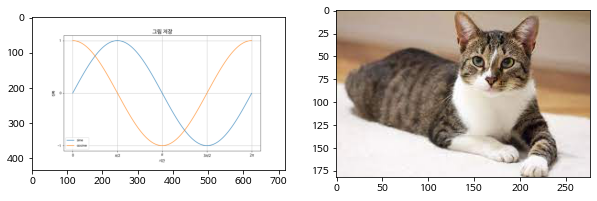

In [4]:
from PIL import Image
img1 = Image.open('삼각함수.png')
img2 = Image.open('cat.jpg')

plt.figure(figsize=(10,4))
plt.subplot(121), plt.imshow(img1)
plt.subplot(1, 2, 2), plt.imshow(img2)
plt.show()

In [5]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.sin(np.pi*t)

t1 = np.arange(0.0, 5.0, 0.01)
t2 = np.arange(0.0, 5.0, 0.01)

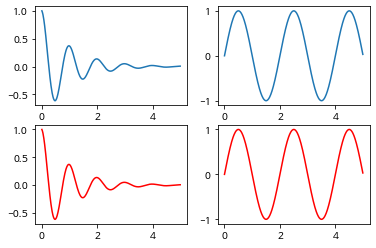

In [6]:
plt.subplot(221)            # 2 x 2, 그래프중 첫번째
plt.plot(t1, f(t1))
plt.subplot(2, 2, 2)
plt.plot(t2, g(t2))
plt.subplot(223)
plt.plot(t1, f(t1), 'r-')
plt.subplot(224)
plt.plot(t2, g(t2), 'r-')
plt.show()

- Anscombe's Quartet

In [8]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [12]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

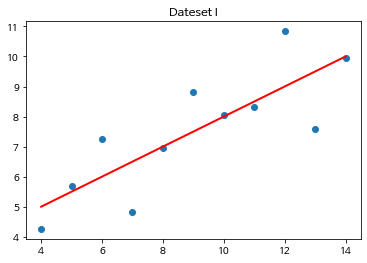

In [11]:
# dataset I 을 선택해서 그려봄
ds = ans[ans.dataset == 'I']
plt.scatter(ds.x, ds.y, marker='o')
plt.plot([4,14], [5,10], 'r-', lw=2)        # y = 0.5 * x + 3
plt.title('Dateset I')
plt.show()

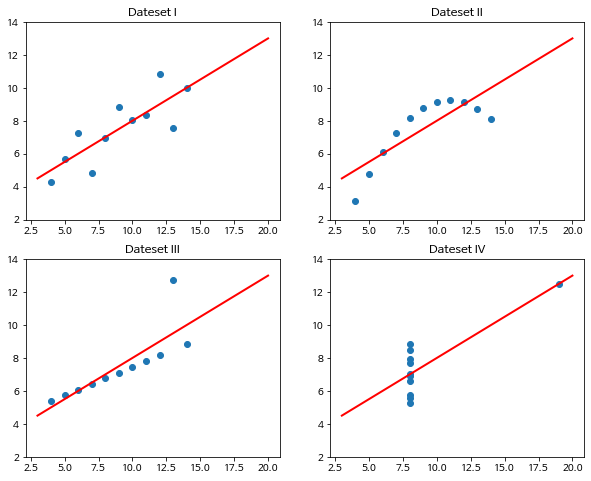

In [17]:
plt.figure(figsize=(10,8))

for index, roman in enumerate(ans.dataset.unique()):      # ['I','II','III','IV']
    plt.subplot(2,2, index+1)
    ds =ans[ans.dataset == roman]
    plt.scatter(ds.x, ds.y, marker='o')
    plt.ylim(2,14)
    plt.plot([3,20], [4.5,13], 'r-', lw=2)
    plt.title(f'Dateset {roman}')

plt.show()

- 좀더 세련된 그래프

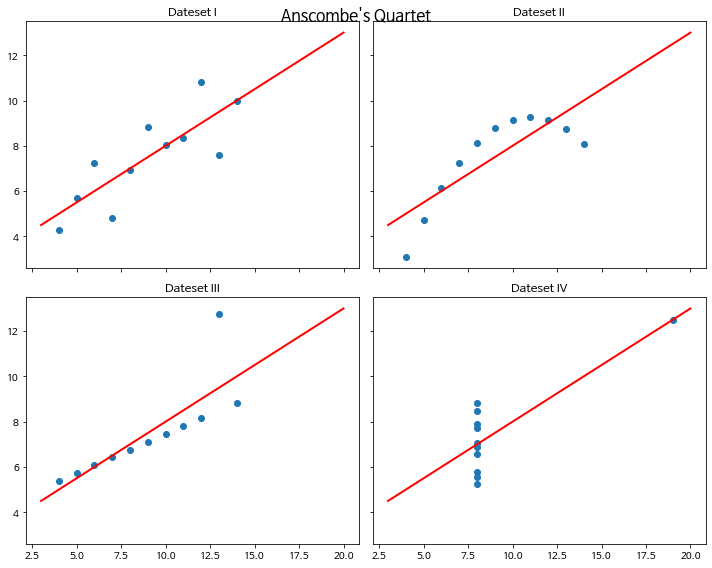

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for index, roman in enumerate(ans.dataset.unique()):     
    ds =ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y, marker='o')
    ax.plot([3,20], [4.5,13], 'r-', lw=2)
    ax.set_title(f'Dateset {roman}')

fig.suptitle("Anscombe's Quartet", fontsize=16)
plt.tight_layout()
plt.show()